In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('Data/dataset.csv')

In [4]:
df=df.drop('Unnamed: 0',axis=1)

In [5]:
df.head()

track_id                 artists  \
0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   

                   track_name  popularity  duration_ms  explicit  \
0                      Comedy          73       230666     False   
1            Ghost - Acoustic          55       149610     False   
2              To Begin Again          57       210826     False   
3  Can't Help Falling In Love          71       201933     False   
4                     Hold On          82       198853     False   

   danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.676  0.4610    1    -6.746     0       0.1430        0.0322   
1         0.420  0.1660    1   -17.235     1       0.0763        0.9240   
2         0.438  0.3590    0    -9.734     1       0.0557        0.2100   
3         0.266  0.0596    0   -18.515     1       0.0363        0.9050   
4         0.618  0.4430    2    -9.681     1       0.0526        0.4690   

   instrumentalness  liveness  valence    tempo  time_signature track_genre  
0          0.000001    0.3580    0.715   87.917               4    acoustic  
1          0.000006    0.1010    0.267   77.489               4    acoustic  
2          0.000000    0.1170    0.120   76.332               4    acoustic  
3          0.000071    0.1320    0.143  181.740               3    acoustic  
4          0.000000    0.0829    0.167  119.949               4    acoustic

In [6]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          114000 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        114000 non-null  int64  
 5   duration_ms       114000 non-null  int64  
 6   explicit          114000 non-null  bool   
 7   danceability      114000 non-null  float64
 8   energy            114000 non-null  float64
 9   key               114000 non-null  int64  
 10  loudness          114000 non-null  float64
 11  mode              114000 non-null  int64  
 12  speechiness       114000 non-null  float64
 13  acousticness      114000 non-null  float64
 14  instrumentalness  114000 non-null  float64
 15  liveness          114000 non-null  float64
 16  valence           11

In [7]:
df.columns

Index(['track_id', 'artists', 'album_name', 'track_name', 'popularity',
       'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'track_genre'],
      dtype='object')

In [8]:
len(df)

114000

In [9]:
len(df.track_genre.unique())

114

In [10]:
num_columns = ['popularity','duration_ms','danceability','energy','loudness','speechiness','acousticness','instrumentalness',
               'liveness','valence','tempo','time_signature']

In [11]:
df.describe()

popularity   duration_ms   danceability         energy  \
count  114000.000000  1.140000e+05  114000.000000  114000.000000   
mean       33.238535  2.280292e+05       0.566800       0.641383   
std        22.305078  1.072977e+05       0.173542       0.251529   
min         0.000000  0.000000e+00       0.000000       0.000000   
25%        17.000000  1.740660e+05       0.456000       0.472000   
50%        35.000000  2.129060e+05       0.580000       0.685000   
75%        50.000000  2.615060e+05       0.695000       0.854000   
max       100.000000  5.237295e+06       0.985000       1.000000   

                 key       loudness           mode    speechiness  \
count  114000.000000  114000.000000  114000.000000  114000.000000   
mean        5.309140      -8.258960       0.637553       0.084652   
std         3.559987       5.029337       0.480709       0.105732   
min         0.000000     -49.531000       0.000000       0.000000   
25%         2.000000     -10.013000       0.000000       0.035900   
50%         5.000000      -7.004000       1.000000       0.048900   
75%         8.000000      -5.003000       1.000000       0.084500   
max        11.000000       4.532000       1.000000       0.965000   

        acousticness  instrumentalness       liveness        valence  \
count  114000.000000     114000.000000  114000.000000  114000.000000   
mean        0.314910          0.156050       0.213553       0.474068   
std         0.332523          0.309555       0.190378       0.259261   
min         0.000000          0.000000       0.000000       0.000000   
25%         0.016900          0.000000       0.098000       0.260000   
50%         0.169000          0.000042       0.132000       0.464000   
75%         0.598000          0.049000       0.273000       0.683000   
max         0.996000          1.000000       1.000000       0.995000   

               tempo  time_signature  
count  114000.000000   114000.000000  
mean      122.147837        3.904035  
std        29.978197        0.432621  
min         0.000000        0.000000  
25%        99.218750        4.000000  
50%       122.017000        4.000000  
75%       140.071000        4.000000  
max       243.372000        5.000000

In [12]:
# Checking duplicate and null values.
print(f'The number of duplicate values are : {df.duplicated().sum()}.')

The number of duplicate values are : 450.


In [13]:
print(f'The number of null values are : \n{df.isna().sum()}.')

The number of null values are : 
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64.


---

# Data Analysis.

In [14]:
from matplotlib import cm
color = cm.inferno_r(np.linspace(.4, .8, 30))

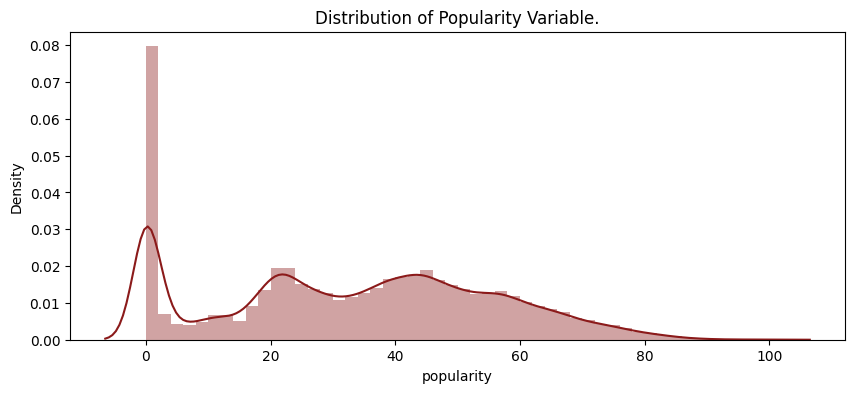

In [15]:
plt.figure(figsize=(10,4))
plt.title("Distribution of Popularity Variable.")
sns.distplot(df['popularity'],color='#8B1A1A');

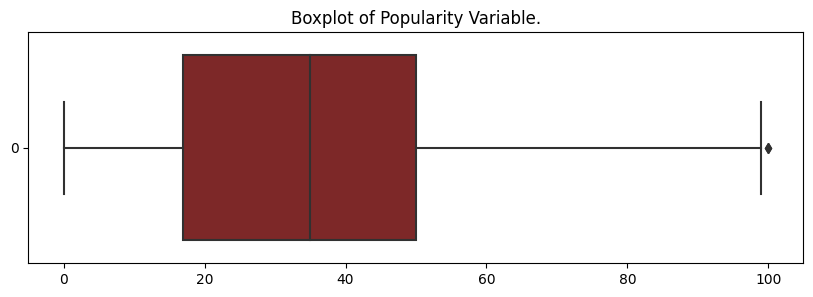

In [16]:
plt.figure(figsize=(10,3))
plt.title("Boxplot of Popularity Variable.")
sns.boxplot(data=df['popularity'],color='#8B1A1A',orient='horizontal');

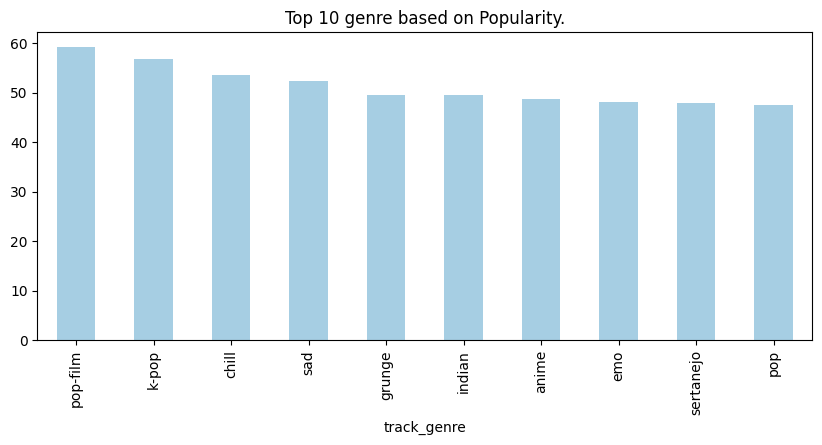

In [17]:
plt.figure(figsize=(10,4))
plt.title("Top 10 genre based on Popularity.")
df.groupby('track_genre').mean()['popularity'].sort_values(ascending=False).head(10).plot(kind='bar',colormap='Paired');

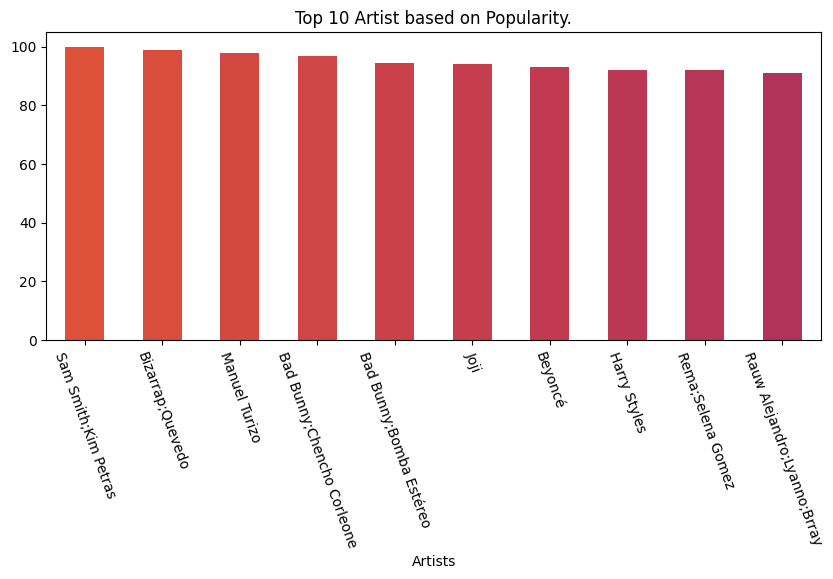

In [18]:
plt.figure(figsize=(10,4))
plt.title("Top 10 Artist based on Popularity.")
df.groupby('artists').mean()['popularity'].sort_values(ascending=False).head(10).plot(kind='bar',color=color,stacked=True)
plt.xlabel('Artists',fontsize=10)
plt.xticks(rotation=-70);

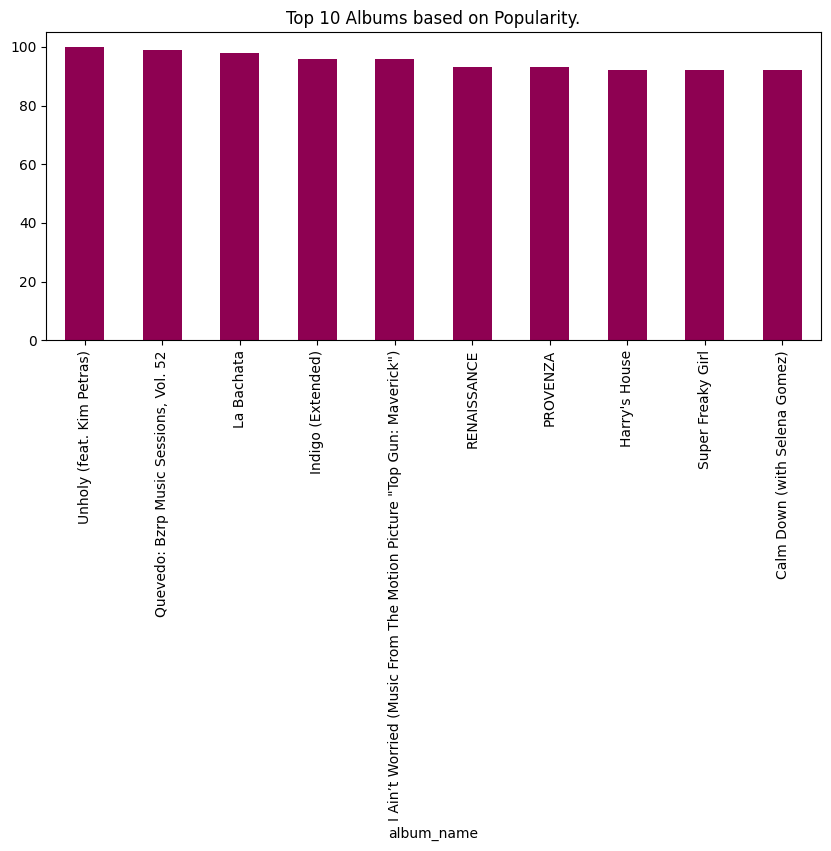

In [19]:
plt.figure(figsize=(10,4))
plt.title("Top 10 Albums based on Popularity.")
df.groupby('album_name').mean()['popularity'].sort_values(ascending=False).head(10).plot(kind='bar',colormap='PiYG');

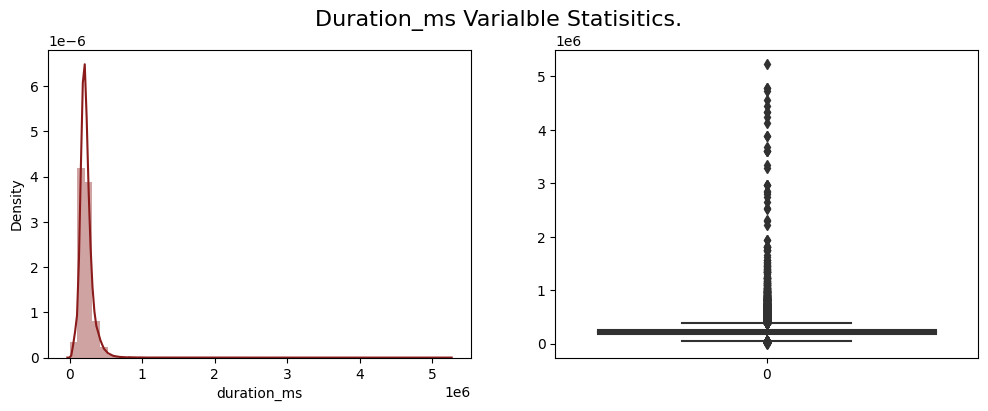

In [20]:
plt.figure(figsize=(12,4))
plt.suptitle("Duration_ms Varialble Statisitics.",fontsize=16)
plt.subplot(1,2,1)
sns.distplot(df['duration_ms'],color='#8B1A1A')
plt.subplot(1,2,2)
sns.boxplot(df['duration_ms'],color='#8B1A1A');

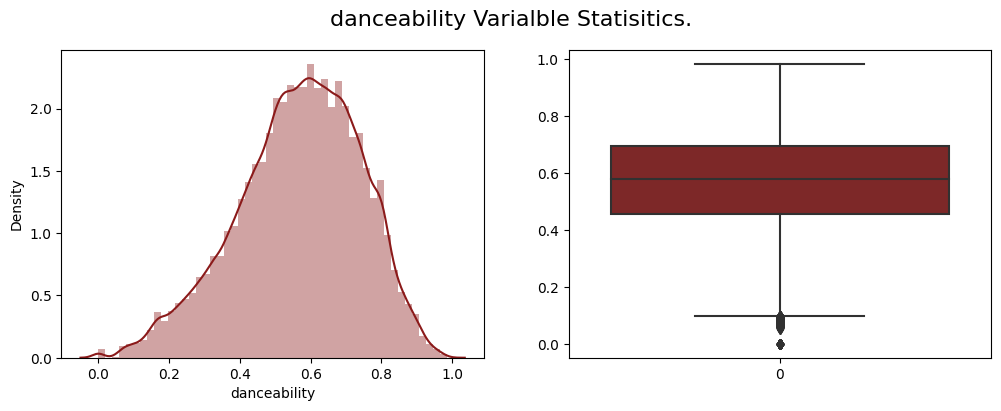

In [21]:
plt.figure(figsize=(12,4))
plt.suptitle("danceability Varialble Statisitics.",fontsize=16)
plt.subplot(1,2,1)
sns.distplot(df['danceability'],color='#8B1A1A')
plt.subplot(1,2,2)
sns.boxplot(df['danceability'],color='#8B1A1A');

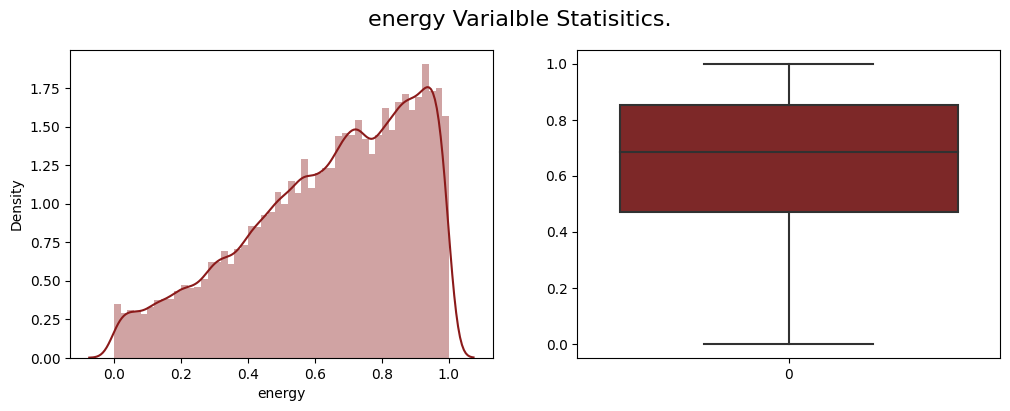

In [22]:
plt.figure(figsize=(12,4))
plt.suptitle("energy Varialble Statisitics.",fontsize=16)
plt.subplot(1,2,1)
sns.distplot(df['energy'],color='#8B1A1A')
plt.subplot(1,2,2)
sns.boxplot(df['energy'],color='#8B1A1A');

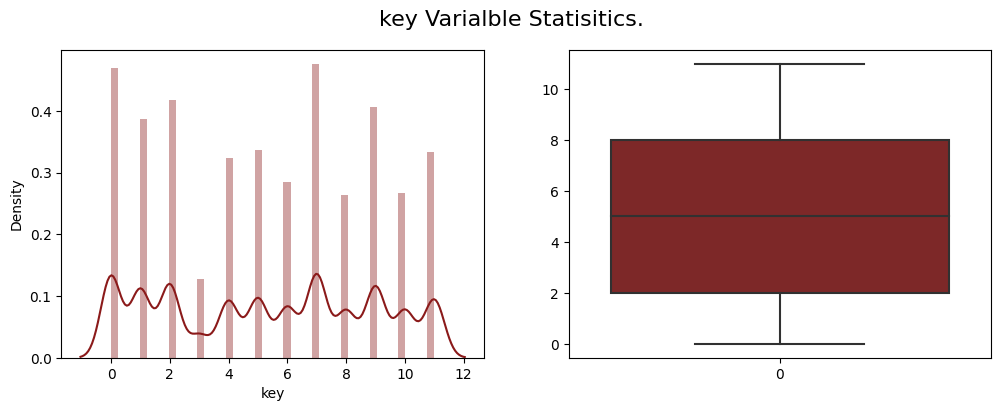

In [23]:
plt.figure(figsize=(12,4))
plt.suptitle("key Varialble Statisitics.",fontsize=16)
plt.subplot(1,2,1)
sns.distplot(df['key'],color='#8B1A1A')
plt.subplot(1,2,2)
sns.boxplot(df['key'],color='#8B1A1A');

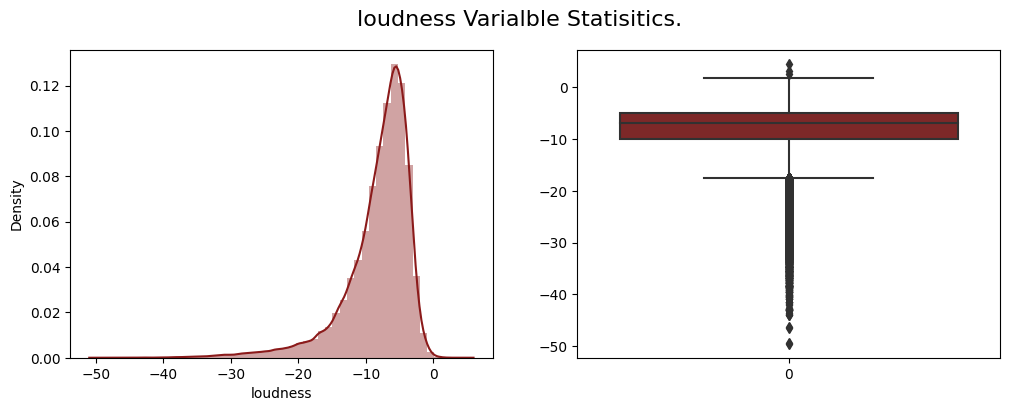

In [24]:
plt.figure(figsize=(12,4))
plt.suptitle("loudness Varialble Statisitics.",fontsize=16)
plt.subplot(1,2,1)
sns.distplot(df['loudness'],color='#8B1A1A')
plt.subplot(1,2,2)
sns.boxplot(df['loudness'],color='#8B1A1A');

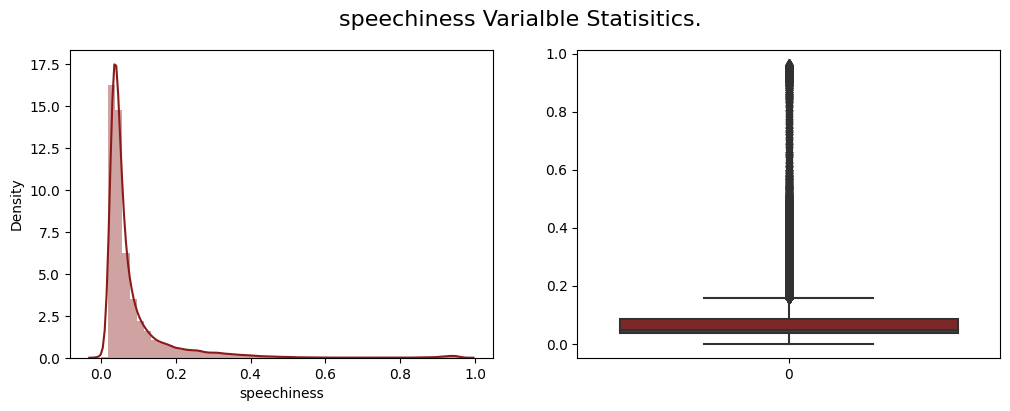

In [25]:
plt.figure(figsize=(12,4))
plt.suptitle("speechiness Varialble Statisitics.",fontsize=16)
plt.subplot(1,2,1)
sns.distplot(df['speechiness'],color='#8B1A1A')
plt.subplot(1,2,2)
sns.boxplot(df['speechiness'],color='#8B1A1A');

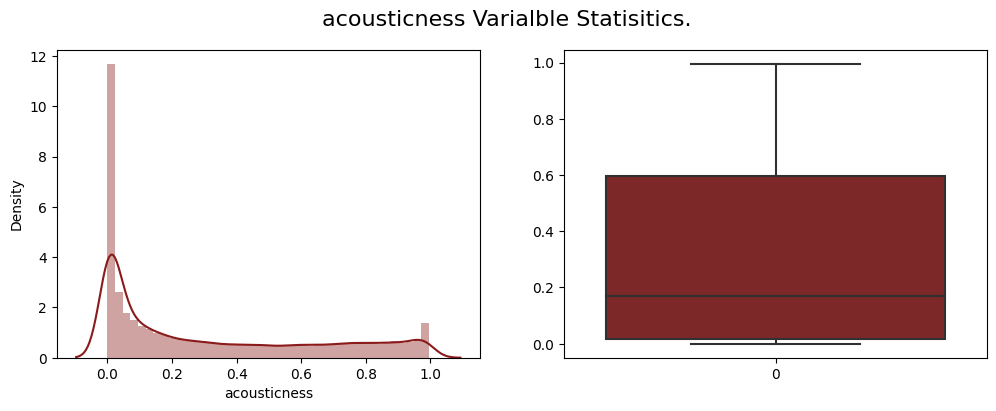

In [26]:
plt.figure(figsize=(12,4))
plt.suptitle("acousticness Varialble Statisitics.",fontsize=16)
plt.subplot(1,2,1)
sns.distplot(df['acousticness'],color='#8B1A1A')
plt.subplot(1,2,2)
sns.boxplot(df['acousticness'],color='#8B1A1A');

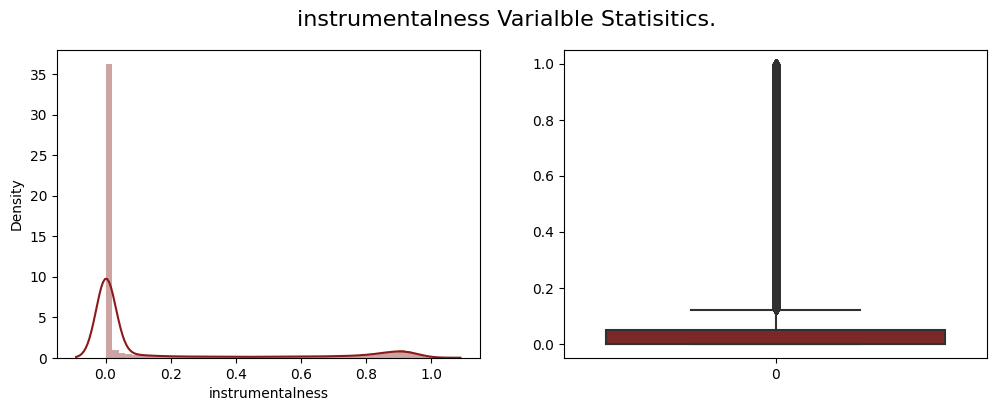

In [27]:
plt.figure(figsize=(12,4))
plt.suptitle("instrumentalness Varialble Statisitics.",fontsize=16)
plt.subplot(1,2,1)
sns.distplot(df['instrumentalness'],color='#8B1A1A')
plt.subplot(1,2,2)
sns.boxplot(df['instrumentalness'],color='#8B1A1A');

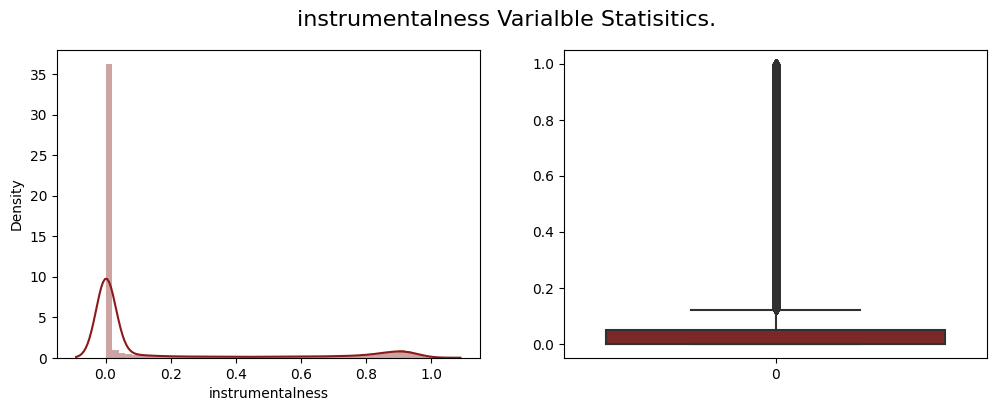

In [28]:
plt.figure(figsize=(12,4))
plt.suptitle("instrumentalness Varialble Statisitics.",fontsize=16)
plt.subplot(1,2,1)
sns.distplot(df['instrumentalness'],color='#8B1A1A')
plt.subplot(1,2,2)
sns.boxplot(df['instrumentalness'],color='#8B1A1A');

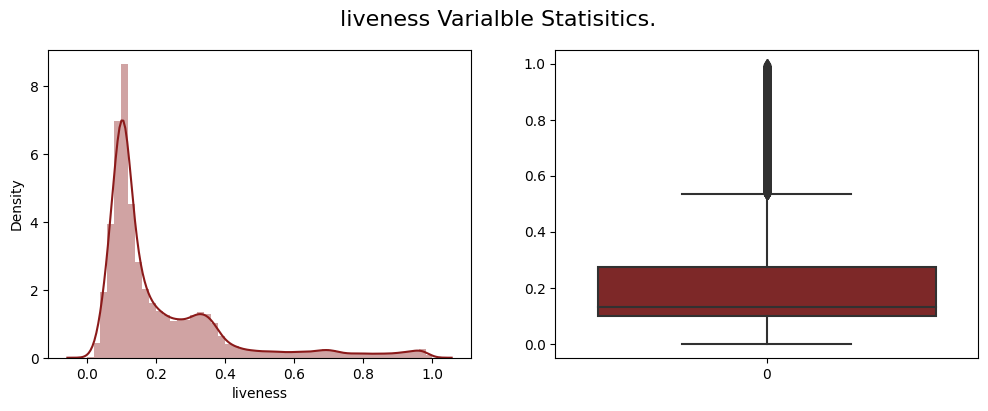

In [29]:
plt.figure(figsize=(12,4))
plt.suptitle("liveness Varialble Statisitics.",fontsize=16)
plt.subplot(1,2,1)
sns.distplot(df['liveness'],color='#8B1A1A')
plt.subplot(1,2,2)
sns.boxplot(df['liveness'],color='#8B1A1A');

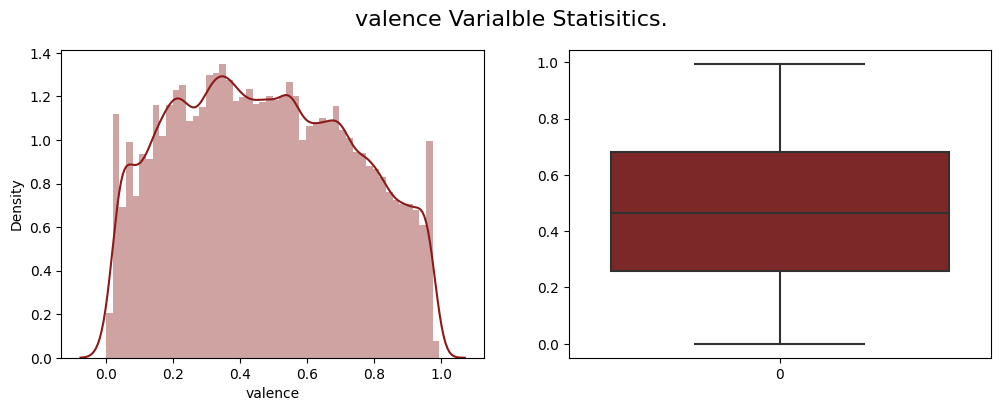

In [30]:
plt.figure(figsize=(12,4))
plt.suptitle("valence Varialble Statisitics.",fontsize=16)
plt.subplot(1,2,1)
sns.distplot(df['valence'],color='#8B1A1A')
plt.subplot(1,2,2)
sns.boxplot(df['valence'],color='#8B1A1A');

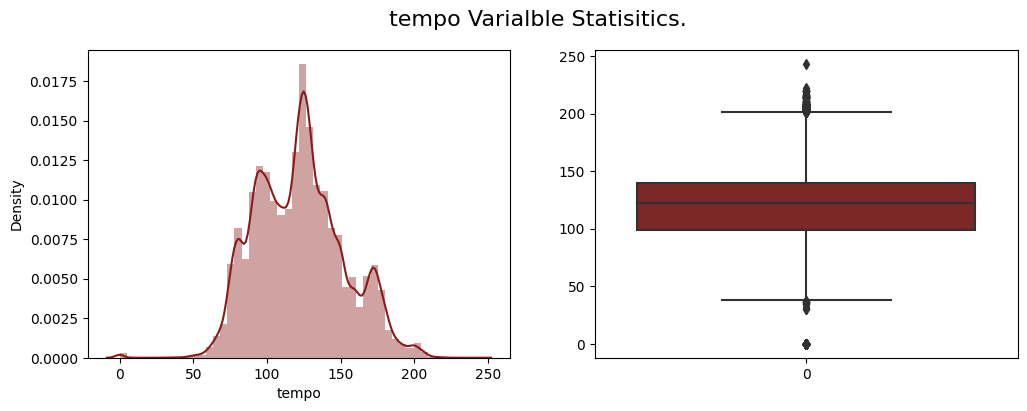

In [31]:
plt.figure(figsize=(12,4))
plt.suptitle("tempo Varialble Statisitics.",fontsize=16)
plt.subplot(1,2,1)
sns.distplot(df['tempo'],color='#8B1A1A')
plt.subplot(1,2,2)
sns.boxplot(df['tempo'],color='#8B1A1A');

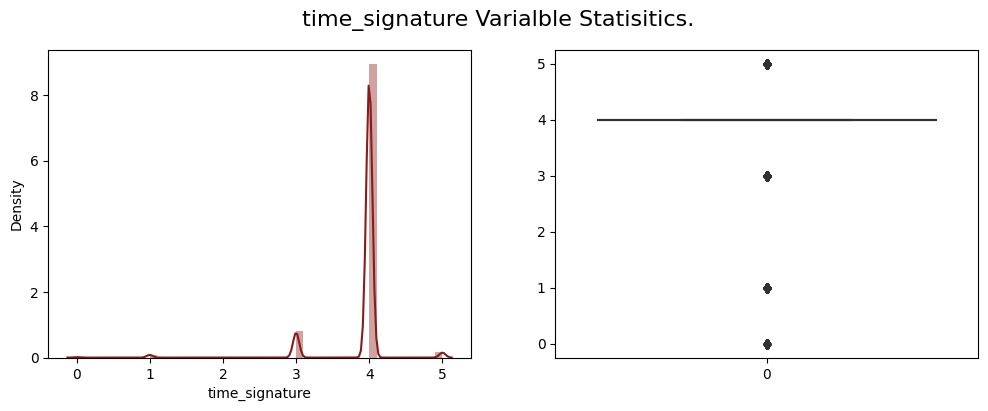

In [32]:
plt.figure(figsize=(12,4))
plt.suptitle("time_signature Varialble Statisitics.",fontsize=16)
plt.subplot(1,2,1)
sns.distplot(df['time_signature'],color='#8B1A1A')
plt.subplot(1,2,2)
sns.boxplot(df['time_signature'],color='#8B1A1A');

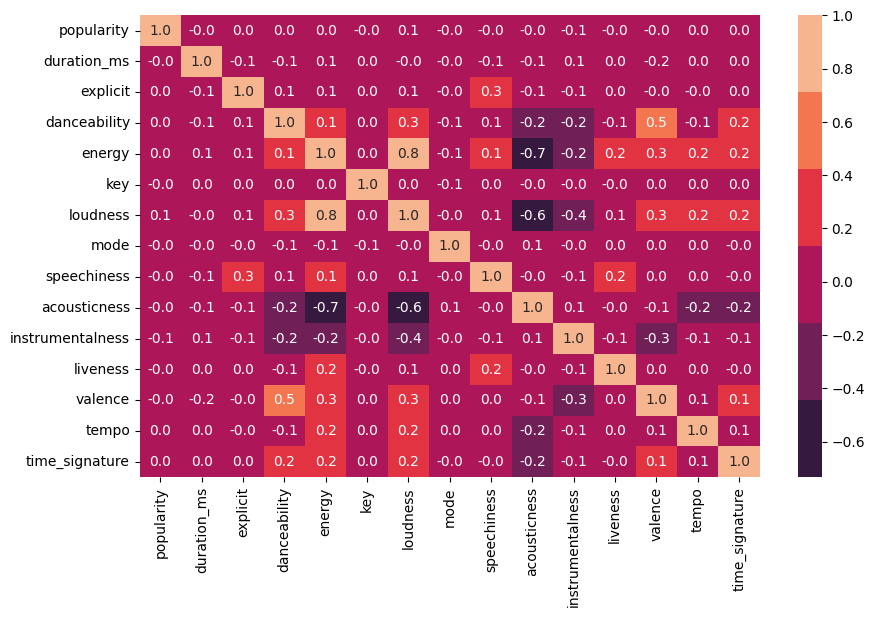

In [33]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True ,fmt=".1f",cmap=sns.color_palette("rocket"));

#### <font color ='#C85C8E'> The Data does not have major multi collinearity problem. </font>

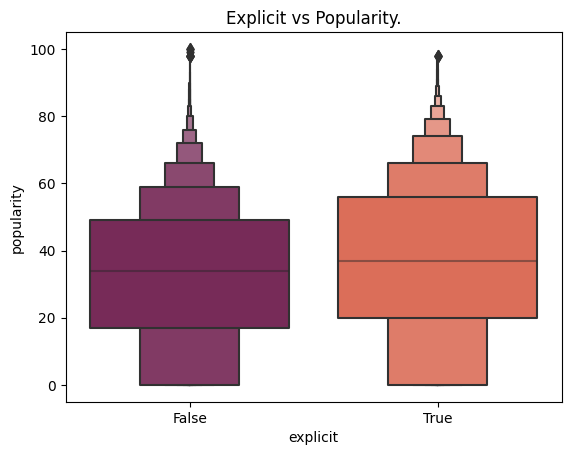

In [34]:
plt.title("Explicit vs Popularity.")
sns.boxenplot(x='explicit', y='popularity', data=df, palette='rocket' );

In [35]:
# SONGS BY ZAYN.
df.loc[df['artists'].str.contains('ZAYN.*')==True]

track_id                 artists  \
2      1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
20152  55n9yjI6qqXh5F2mYvUc2y       ZAYN;Taylor Swift   
20405  0PDUDa38GO8lMxLCRc4lL1                    ZAYN   
20801  2cEmWBBlCfR9wWrY9JmTyt                    ZAYN   
30504  3KPBh2wNoigGDMWQMeE7IV    R3HAB;ZAYN;Jungleboi   
30850  0B2RttXEiyXsMeQ7mMP3EI          Snakehips;ZAYN   
31103  1iQDltZqI7BXnHrFy4Qo1k              SHAED;ZAYN   
31114  2ez6qvOTHKeI3ss80NGqnI              SHAED;ZAYN   
31950  0B2RttXEiyXsMeQ7mMP3EI          Snakehips;ZAYN   
53900  0B2RttXEiyXsMeQ7mMP3EI          Snakehips;ZAYN   
81163  3e7sxremeOE3wTySiOhGiP                ZAYN;Sia   
81905  55n9yjI6qqXh5F2mYvUc2y       ZAYN;Taylor Swift   

                                           album_name  \
2                                      To Begin Again   
20152  reputation Stadium Tour Surprise Song Playlist   
20405                   Mind Of Mine (Deluxe Edition)   
20801                                    Icarus Falls   
30504                                 Flames (The EP)   
30850                              Cruel (feat. ZAYN)   
31103                          Trampoline (with ZAYN)   
31114                                   Melt (Deluxe)   
31950                              Cruel (feat. ZAYN)   
53900                              Cruel (feat. ZAYN)   
81163                                    Icarus Falls   
81905  reputation Stadium Tour Surprise Song Playlist   

                                             track_name  popularity  \
2                                        To Begin Again          57   
20152  I Don’t Wanna Live Forever (Fifty Shades Darker)          80   
20405                                        PILLOWTALK          78   
20801                                            Let Me          68   
30504                                Flames (with ZAYN)          48   
30850                                Cruel (feat. ZAYN)          58   
31103                            Trampoline (with ZAYN)          69   
31114                            Trampoline (with ZAYN)          67   
31950                                Cruel (feat. ZAYN)          58   
53900                                Cruel (feat. ZAYN)          58   
81163           Dusk Till Dawn (feat. Sia) - Radio Edit          79   
81905  I Don’t Wanna Live Forever (Fifty Shades Darker)          80   

       duration_ms  explicit  danceability  energy  key  loudness  mode  \
2           210826     False         0.438   0.359    0    -9.734     1   
20152       247160     False         0.731   0.445    0    -8.418     1   
20405       202746      True         0.584   0.700   11    -4.275     1   
20801       185373     False         0.460   0.566    9    -5.637     1   
30504       155526     False         0.358   0.644    5    -8.027     0   
30850       228253      True         0.603   0.879    5    -4.098     1   
31103       184280     False         0.619   0.459    7    -5.782     0   
31114       184280     False         0.619   0.459    7    -5.782     0   
31950       228253      True         0.603   0.879    5    -4.098     1   
53900       228253      True         0.603   0.879    5    -4.098     1   
81163       239000     False         0.259   0.437   11    -6.589     0   
81905       247160     False         0.731   0.445    0    -8.418     1   

       speechiness  acousticness  instrumentalness  liveness  valence  \
2           0.0557        0.2100          0.000000    0.1170   0.1200   
20152       0.0533        0.0586          0.000020    0.1400   0.1060   
20405       0.0456        0.1170          0.000000    0.0939   0.4380   
20801       0.0502        0.2390          0.000006    0.0967   0.1890   
30504       0.0811        0.1540          0.000000    0.0898   0.4360   
30850       0.1240        0.0184          0.000000    0.1560   0.3180   
31103       0.0334        0.5600          0.000000    0.1370   0.4980   
31114       0.0334        0.5600          0.000000   

# DATA Preprocessing.

In [48]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [38]:
# Selecting columns for Building Recommendor Engine.
df1 = df.drop(['track_id','album_name','track_name','explicit'],axis=1)

In [39]:
df1= df1.drop_duplicates()

In [40]:
df1.head()

artists  popularity  duration_ms  danceability  energy  key  \
0             Gen Hoshino          73       230666         0.676  0.4610    1   
1            Ben Woodward          55       149610         0.420  0.1660    1   
2  Ingrid Michaelson;ZAYN          57       210826         0.438  0.3590    0   
3            Kina Grannis          71       201933         0.266  0.0596    0   
4        Chord Overstreet          82       198853         0.618  0.4430    2   

   loudness  mode  speechiness  acousticness  instrumentalness  liveness  \
0    -6.746     0       0.1430        0.0322          0.000001    0.3580   
1   -17.235     1       0.0763        0.9240          0.000006    0.1010   
2    -9.734     1       0.0557        0.2100          0.000000    0.1170   
3   -18.515     1       0.0363        0.9050          0.000071    0.1320   
4    -9.681     1       0.0526        0.4690          0.000000    0.0829   

   valence    tempo  time_signature track_genre  
0    0.715   87.917               4    acoustic  
1    0.267   77.489               4    acoustic  
2    0.120   76.332               4    acoustic  
3    0.143  181.740               3    acoustic  
4    0.167  119.949               4    acoustic

In [41]:
# Preprocessing.
# Label Encoding for object datatypes columns.
def labelencoder(df):
    for c in df.columns:
        if df[c].dtype=='object': 
            df[c] = df[c].fillna('N')
            lbl = LabelEncoder()
            lbl.fit(list(df[c].values))
            df[c] = lbl.transform(df[c].values)
    return df

In [42]:
df1 = labelencoder(df1)

In [45]:
len(df1)

106918

In [47]:
df1.head()

artists  popularity  duration_ms  danceability  energy  key  loudness  \
0    10357          73       230666         0.676  0.4610    1    -6.746   
1     3287          55       149610         0.420  0.1660    1   -17.235   
2    12397          57       210826         0.438  0.3590    0    -9.734   
3    14839          71       201933         0.266  0.0596    0   -18.515   
4     5255          82       198853         0.618  0.4430    2    -9.681   

   mode  speechiness  acousticness  instrumentalness  liveness  valence  \
0     0       0.1430        0.0322          0.000001    0.3580    0.715   
1     1       0.0763        0.9240          0.000006    0.1010    0.267   
2     1       0.0557        0.2100          0.000000    0.1170    0.120   
3     1       0.0363        0.9050          0.000071    0.1320    0.143   
4     1       0.0526        0.4690          0.000000    0.0829    0.167   

     tempo  time_signature  track_genre  
0   87.917               4            0  
1   77.489               4            0  
2   76.332               4            0  
3  181.740               3            0  
4  119.949               4            0

In [49]:
# Scaling data
def Scaler(df):
    for c in df.colums:
        if df[c].dtype =='int' or df[c]=='float':
            df[c] = df[c].fillna(0)
            scaler = StandardScaler()
            scaler.fit(list(df[c].values))
            df[c]=  sclaer.transform(df[c].values)
    return df
            